Text(0.0, 1.0, 'Mean Temperature')

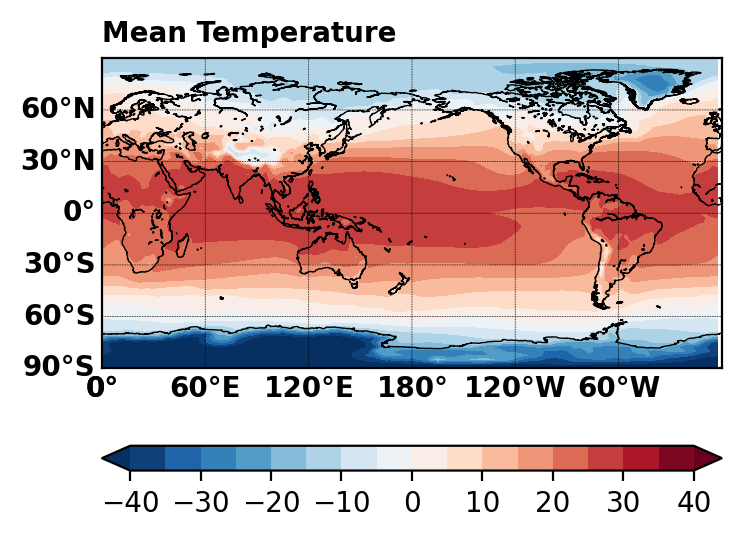

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

file2 = "/home/ben/ictp/numforGeosciences-ICTP/datasets/lec1-era5_tas_1959_2021_25deg.nc"
f1 = nc.Dataset(file2)
lon = f1.variables['lon'][:]
lat = f1.variables['lat'][:]
var = f1.variables['t2m'][:,:,:]
tas = np.average(var-273.15, axis=0)
lonall, latall = np.meshgrid(lon, lat)
parallels = np.arange(-90,90,30.) # make latitude lines
meridians = np.arange(-180,180,60.) # make longitude lines

# plot
plt.figure(num=None, figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
m = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution="l")
m.drawcoastlines(linewidth=0.5)
x, y = m(lonall, latall)
levels=[-40,-35,-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40]
jjj=m.contourf(x,y,tas[:,:],levels=levels, extend = 'both', cmap=plt.cm.RdBu_r)
m.colorbar(jjj,location='bottom',size="8%",pad='25%')
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold', linewidth=0.3)
plt.title("Mean Temperature", loc='left',fontsize=10,weight='bold')

Text(0.0, 1.0, 'Standard Deviation Temperature')

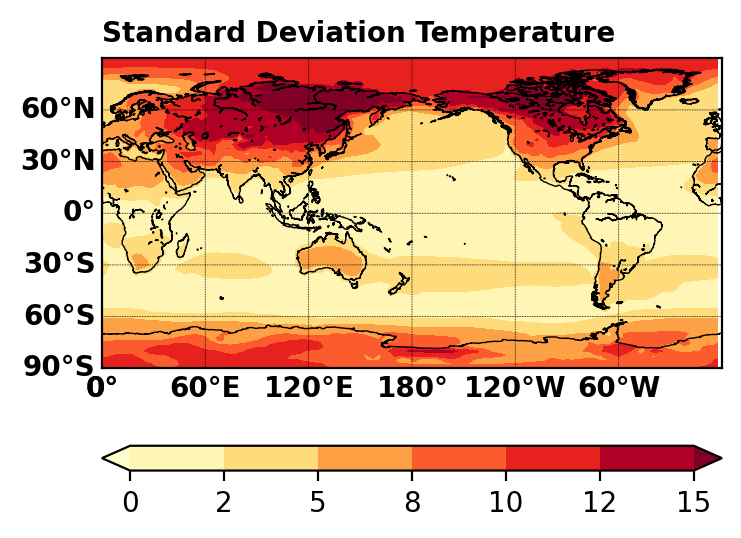

In [2]:
standardvar = np.zeros((len(lat), len(lon)))
for i in range(len(lat)):
    for j in range(len(lon)):
        standardvar[i, j] = np.std(var[:,i,j])

# plot
plt.figure(num=None, figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
m = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution="l")
m.drawcoastlines(linewidth=0.5)
x, y = m(lonall, latall)
levels=[0,2,5,8,10,12,15]
jjj=m.contourf(x,y,standardvar,levels=levels, extend = 'both', cmap=plt.cm.YlOrRd)
m.colorbar(jjj,location='bottom',size="8%", pad='25%')
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold', linewidth=0.3)
plt.title("Standard Deviation Temperature", loc='left',fontsize=10,weight='bold')